In [4]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame



plt.rcParams["figure.figsize"] = (15,5)
sns.set(style="whitegrid")

<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

### Please Use Formatting to Make it Clear What I Should be Looking at! Please!!! I Beg You!!!

In [1]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
import pandas as pd

dfLE = pd.read_csv("data/led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
dfLE.head()


C:\Users\kibang\AppData\Local\Temp\ipykernel_16972\3481695034.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
C:\Users\kibang\AppData\Local\Temp\ipykernel_16972\3481695034.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', Tr

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,4.136734e+09,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,1.166938e+09,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,7.345597e+10,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,2.177835e+10,1.014710e+07,8.04375
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,0.000000e+00,NaN,8.84375


<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Show print the labels along with just that column. Print 10 random rows of that data. 

Note: you'll have to look at the units to ensure you get it right. 

In [3]:
# ---------- Part 1: GDP per Capita + labels + 10 random rows ----------

import pandas as pd
import numpy as np

dfLE = pd.read_csv("data/led.csv")


# 2) Cleanup from the worksheet
dfLE.rename(columns={"Status": "isDeveloped"}, inplace=True)
dfLE["isDeveloped"].replace(("Developed", "Developing"), (1, 0), inplace=True)
dfLE = dfLE.drop(columns=[
    "Year", "Incomecompositionofresources", "thinness5-9years",
    "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"
])
dfLE = dfLE.groupby("Country", as_index=False).mean(numeric_only=True)

# 3) Unit check + GDP per Capita
g, p = dfLE["GDP"], dfLE["Population"]
mask = g.notna() & p.notna() & (p > 0)
med_pc = (g[mask] / p[mask]).median()

if 200 <= med_pc <= 200_000:
    dfLE["GDP_per_Capita"] = dfLE["GDP"] / dfLE["Population"]
    unit_note = "GDP interpreted as TOTAL USD → per-capita = GDP / Population."
else:
    dfLE["GDP_per_Capita"] = dfLE["GDP"]
    unit_note = "GDP interpreted as already PER-CAPITA USD."

# Guard against zero pop producing inf
dfLE.loc[dfLE["Population"].fillna(0) == 0, "GDP_per_Capita"] = np.nan

# 4) Print labels + just that column (10 random rows)
labels = ["Country", "GDP_per_Capita"]  # 'Year' was dropped earlier after grouping
print("Columns shown:", labels)
out = dfLE[labels].dropna(subset=["GDP_per_Capita"]).copy()
out["GDP_per_Capita"] = out["GDP_per_Capita"].round(2)
print(out.sample(10, random_state=3450).to_string(index=False))
print("Unit check:", unit_note)



Columns shown: ['Country', 'GDP_per_Capita']
               Country  GDP_per_Capita
               Ukraine          416.27
                Serbia         3764.67
                 Spain        19240.57
CentralAfricanRepublic          378.78
                  Togo          326.03
               Belarus         4234.61
            Montenegro         4922.21
               Lesotho          778.05
                Israel        23542.35
                  Mali          571.80
Unit check: GDP interpreted as TOTAL USD → per-capita = GDP / Population.


C:\Users\kibang\AppData\Local\Temp\ipykernel_16972\1848620563.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfLE["isDeveloped"].replace(("Developed", "Developing"), (1, 0), inplace=True)
C:\Users\kibang\AppData\Local\Temp\ipykernel_16972\1848620563.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', 

### Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)

Print each distribution is some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options. Think of what to try to Google for an example for printing multiple charts, a grid of charts, etc... and try to adapt one to yours. There is also a way to do it using some thinkstats/thinkplot stuff. 
<li><b>5 points are for doing it in an efficient way - just listing off each column is lots of typing... Remember, the #1 trait of programmers is laziness with respect to repetitive tasks. If we are doing the same thing over and over with tiny changes, try to think of a condensed way to do this...</b>
</ul>

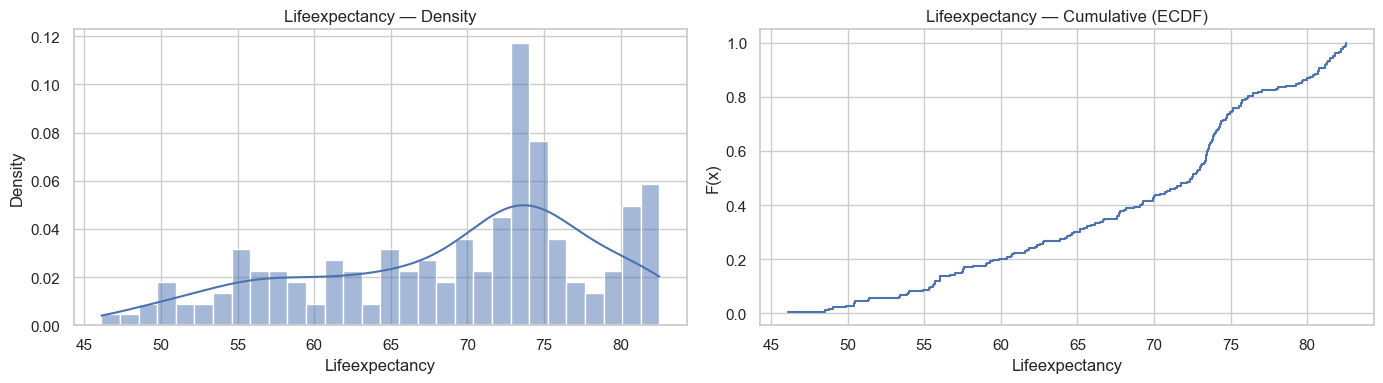

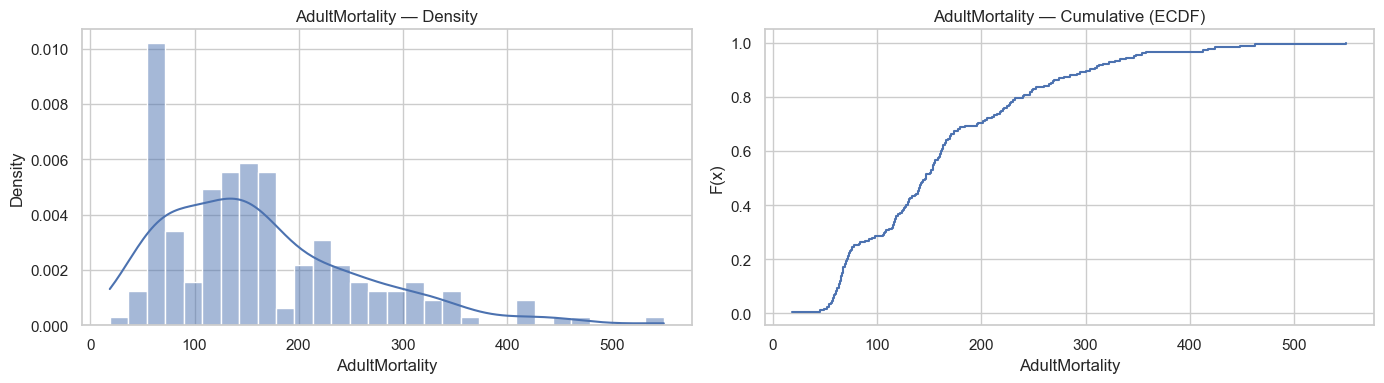

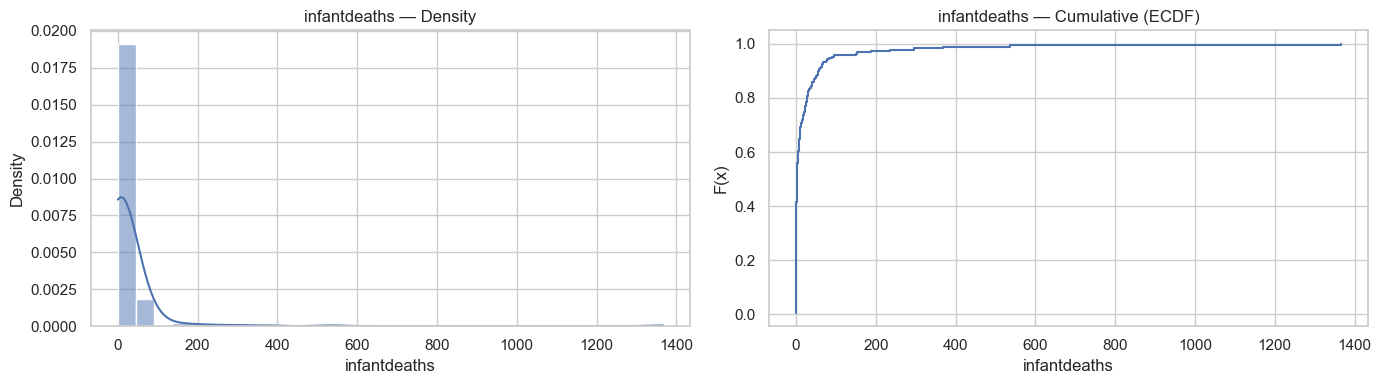

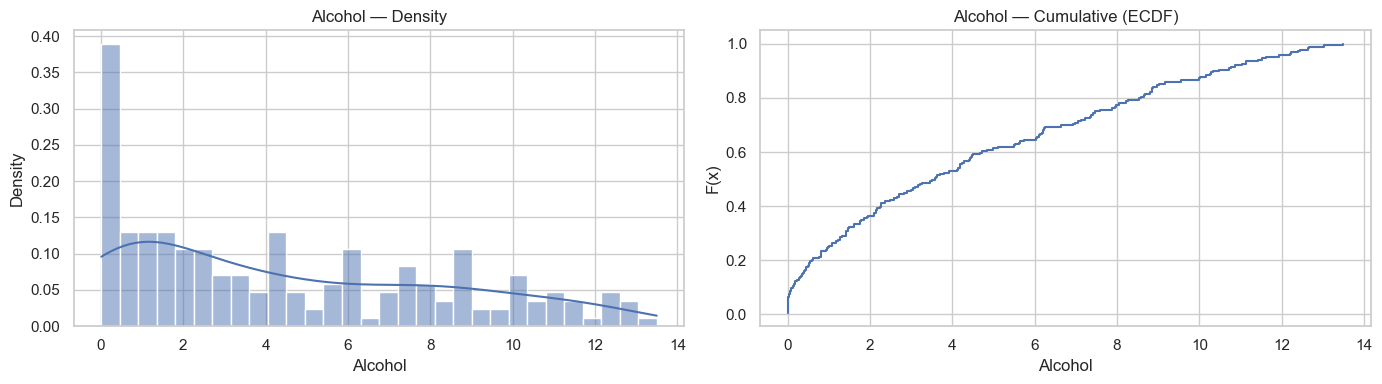

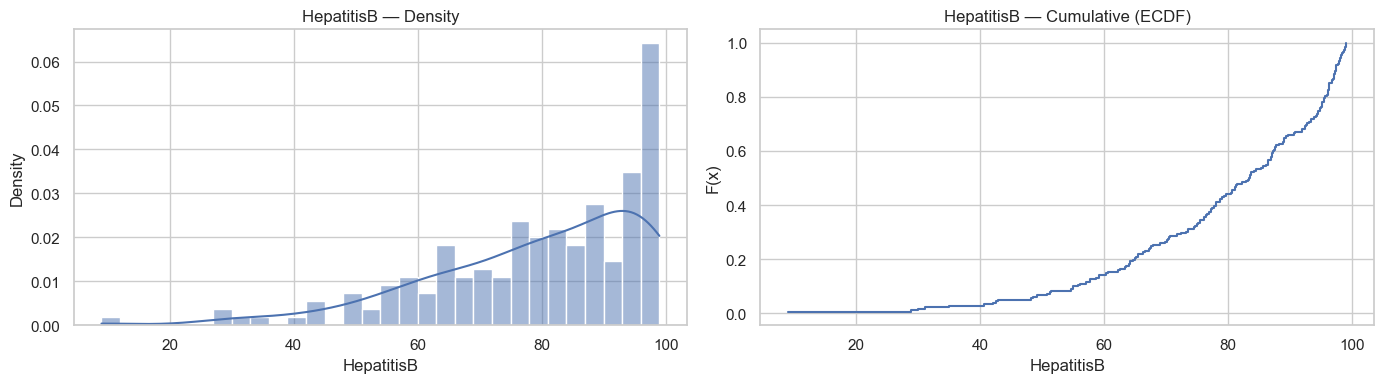

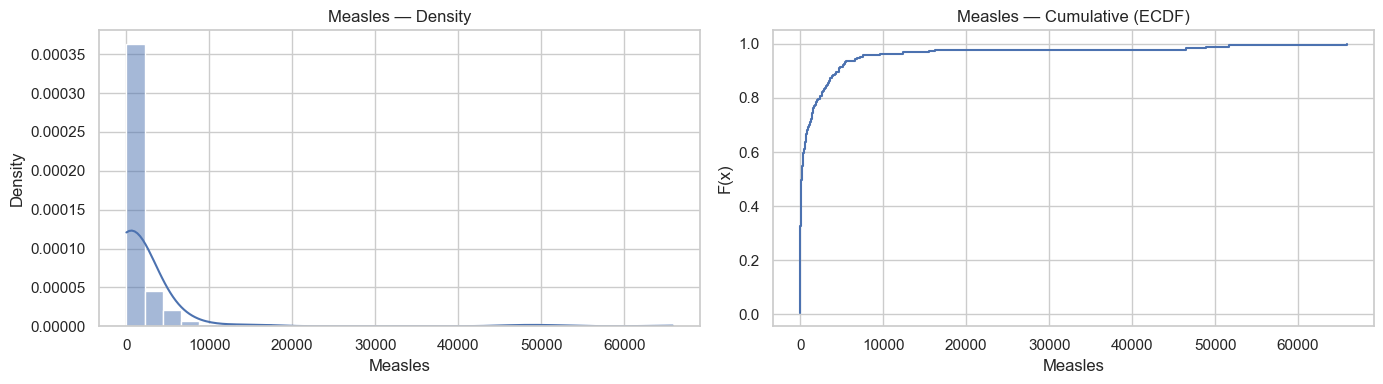

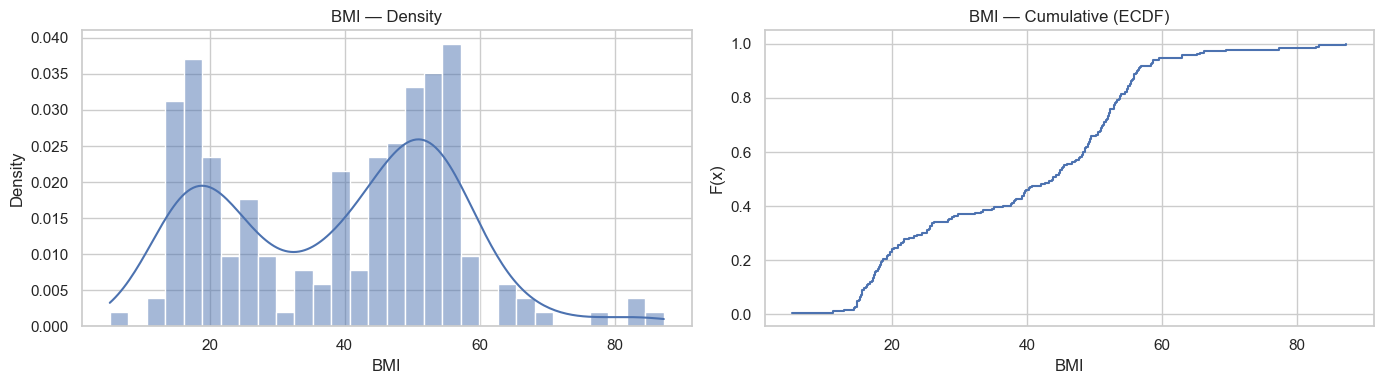

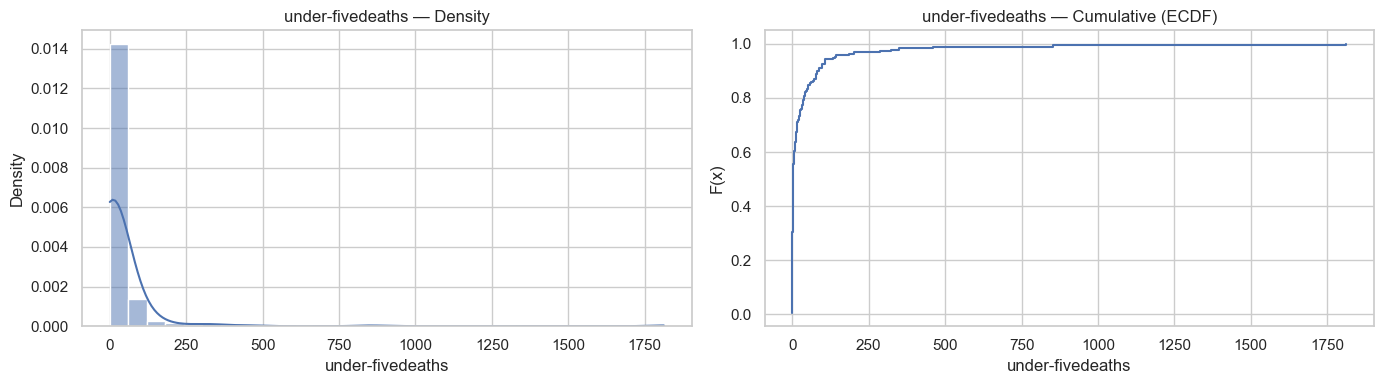

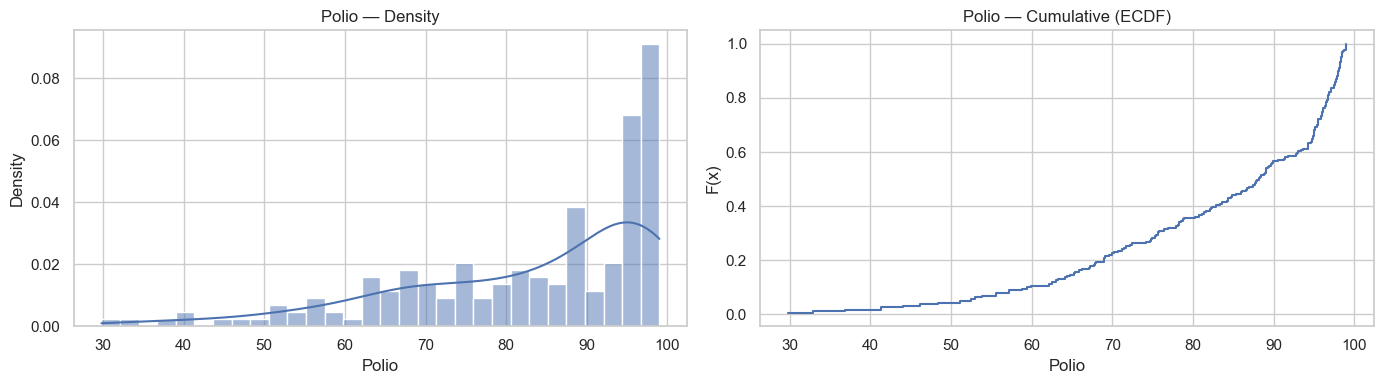

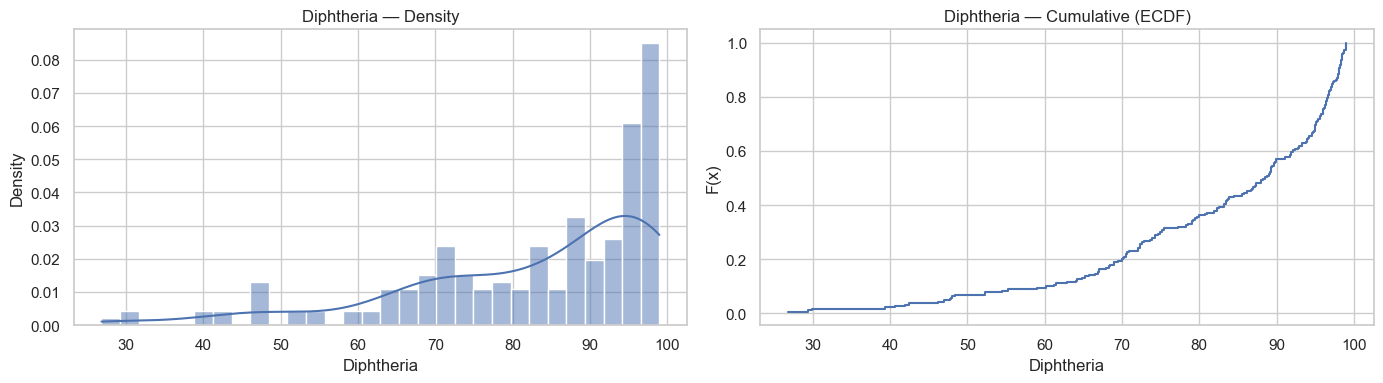

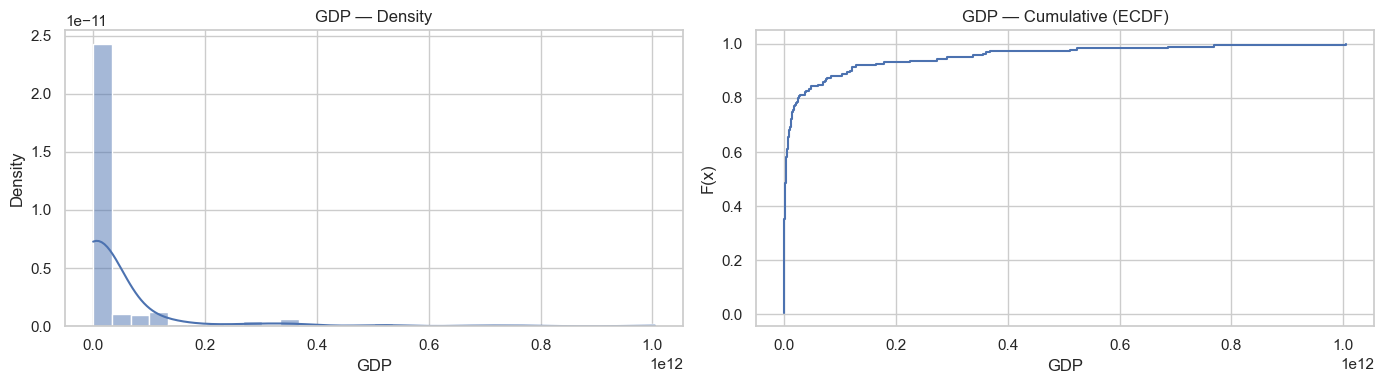

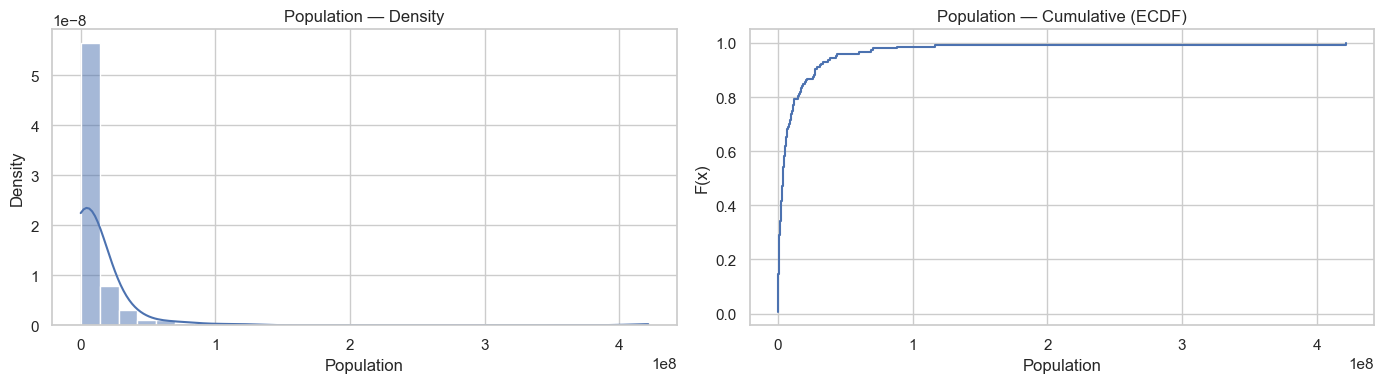

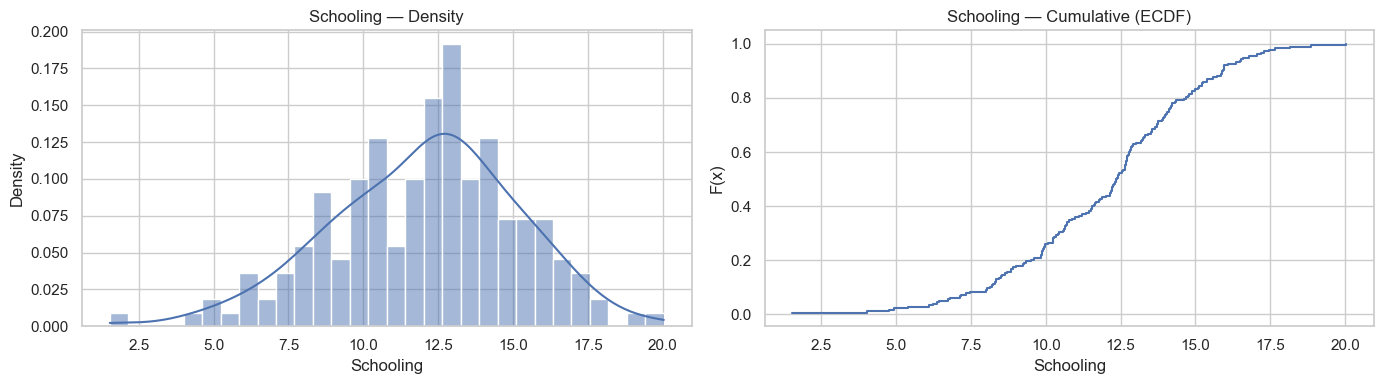

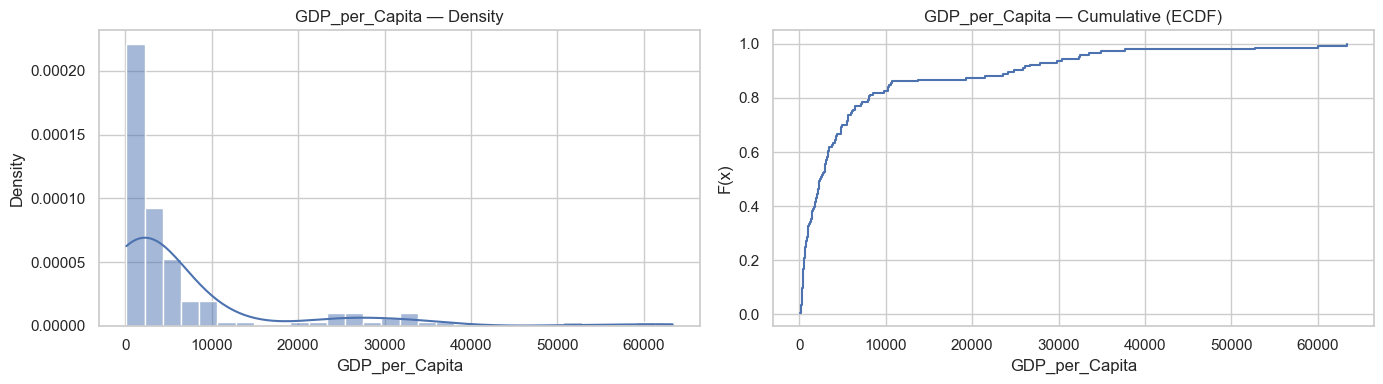

In [10]:
# ---------- Part 2: Visualize each distribution (density + cumulative) ----------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (14, 4)

# 1) Picking numeric columns
num_cols = dfLE.select_dtypes(include=np.number).columns.tolist()
skip = {"isDeveloped"}  # add more if desired, e.g., {'Measles','under-fivedeaths'}
cols = [c for c in num_cols if c not in skip]

# 2)  ploting ECDF (cumulative distribution)
def plot_ecdf(ax, s, label=None):
    x = np.sort(s)
    y = np.arange(1, len(x) + 1) / len(x)
    ax.step(x, y, where="post", label=label)

# 3) Loop once—each variable gets a tidy two-panel figure
for col in cols:
    s = dfLE[col].dropna()
    if s.empty:  
        continue

    fig, axes = plt.subplots(1, 2, figsize=(14, 4))

    # Left: density (histogram + KDE)
    sns.histplot(s, bins=30, stat="density", kde=True, ax=axes[0])
    axes[0].set_title(f"{col} — Density")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Density")

    # Right: cumulative (ECDF)
    plot_ecdf(axes[1], s)
    axes[1].set_title(f"{col} — Cumulative (ECDF)")
    axes[1].set_xlabel(col)
    axes[1].set_ylabel("F(x)")

    plt.tight_layout()
    plt.show()


### Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it <b>without</b> using a fit() method. Plot the emperical data on the same graph as the analytical distribution. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 
</ul>

Chosen distribution: Normal(μ=12.03, σ=3.10)


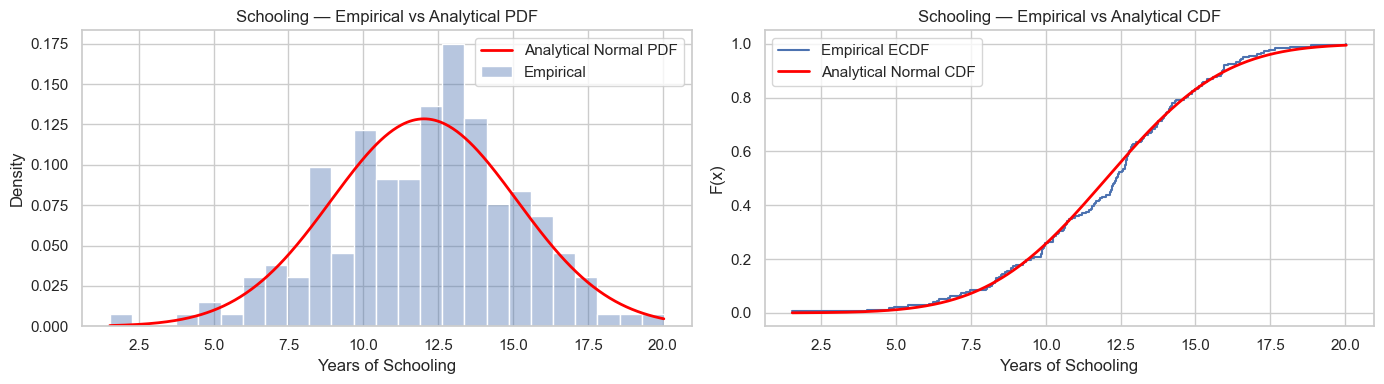

Canada's Schooling ≈ 15.88 years
Analytical prediction: 12.0% within ±1 year of Canada
Empirical share: 14.0% within ±1 year of Canada


In [ ]:
# ---------- Part 3: Analytical Distribution for SCHOOLING ----------

import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Choose analytical distribution: Normal(μ, σ)
#    Justification: Schooling across countries is roughly symmetric & bell-shaped.
school = dfLE["Schooling"].dropna()
mu, sigma = school.mean(), school.std(ddof=1)
print(f"Chosen distribution: Normal(μ={mu:.2f}, σ={sigma:.2f})")

# 2) Analytical PDF & CDF (no fit() used)
x_vals = np.linspace(school.min(), school.max(), 400)
pdf_vals = ss.norm.pdf(x_vals, loc=mu, scale=sigma)
cdf_vals = ss.norm.cdf(x_vals, loc=mu, scale=sigma)

# 3) Plot empirical histogram + analytical PDF
fig, ax = plt.subplots(1, 2, figsize=(14,4))

# Left: PDF comparison
sns.histplot(school, bins=25, stat="density", alpha=0.4, label="Empirical", ax=ax[0])
ax[0].plot(x_vals, pdf_vals, color="red", lw=2, label="Analytical Normal PDF")
ax[0].set_title("Schooling — Empirical vs Analytical PDF")
ax[0].set_xlabel("Years of Schooling")
ax[0].legend()

# Right: CDF comparison
sorted_school = np.sort(school)
ecdf_y = np.arange(1, len(sorted_school)+1) / len(sorted_school)
ax[1].step(sorted_school, ecdf_y, where="post", label="Empirical ECDF")
ax[1].plot(x_vals, cdf_vals, color="red", lw=2, label="Analytical Normal CDF")
ax[1].set_title("Schooling — Empirical vs Analytical CDF")
ax[1].set_xlabel("Years of Schooling")
ax[1].set_ylabel("F(x)")
ax[1].legend()

plt.tight_layout()
plt.show()

# 4)  Distribution to predict % within ±1 year of Canada
canada_school = dfLE.loc[dfLE["Country"].str.lower()=="canada", "Schooling"].mean()
if pd.isna(canada_school):
    print("Canada not found; using mean as proxy.")
    canada_school = mu

low, high = canada_school - 1, canada_school + 1
p_within = ss.norm.cdf(high, mu, sigma) - ss.norm.cdf(low, mu, sigma)
empirical = ((school >= low) & (school <= high)).mean()

print(f"Canada's Schooling ≈ {canada_school:.2f} years")
print(f"Analytical prediction: {100*p_within:.1f}% within ±1 year of Canada")
print(f"Empirical share: {100*empirical:.1f}% within ±1 year of Canada")


### Part 3: Create another analytical distribution for GDP per Capita (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 
</ul>

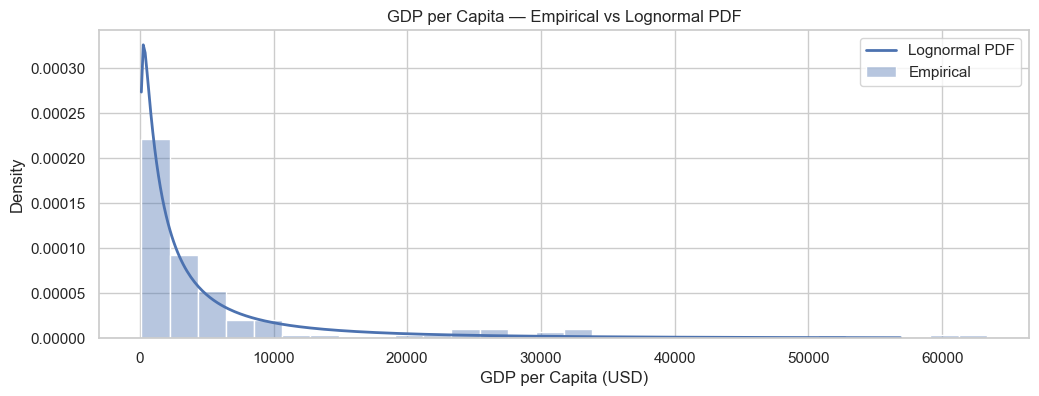

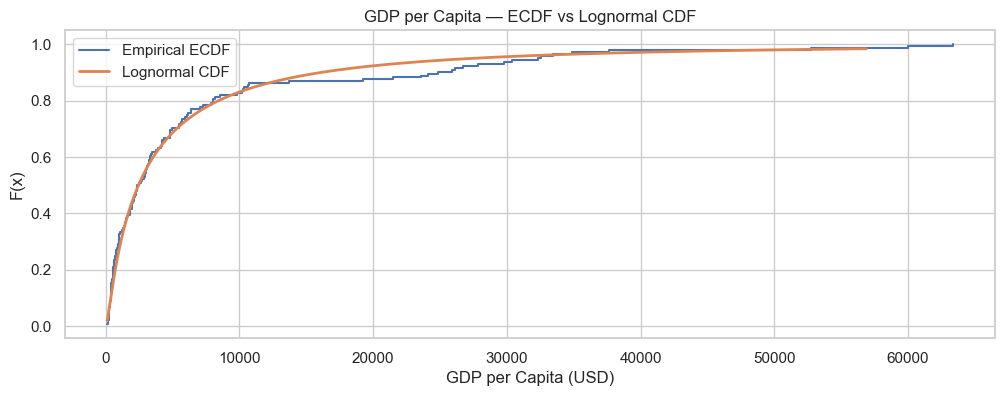

Count 144, Range 117.47-63337.61, Median 2424.22
Reliable? Yes


In [ ]:
import numpy as np, scipy.stats as ss, matplotlib.pyplot as plt, seaborn as sns

gpc = dfLE["GDP_per_Capita"].replace([np.inf, -np.inf], np.nan).dropna()
gpc = gpc[gpc > 0]
m, s = np.log(gpc).mean(), np.log(gpc).std(ddof=1)      

x = np.linspace(gpc.min(), gpc.quantile(0.99), 400)
pdf = ss.lognorm.pdf(x, s=s, scale=np.exp(m))
cdf = ss.lognorm.cdf(x, s=s, scale=np.exp(m))

plt.figure(figsize=(12,4))
sns.histplot(gpc, bins=30, stat="density", alpha=0.4, label="Empirical")
plt.plot(x, pdf, lw=2, label="Lognormal PDF"); plt.xlabel("GDP per Capita (USD)")
plt.title("GDP per Capita — Empirical vs Lognormal PDF"); plt.legend(); plt.show()

gx = np.sort(gpc); gy = np.arange(1, len(gx)+1)/len(gx)
plt.figure(figsize=(12,4))
plt.step(gx, gy, where="post", label="Empirical ECDF")
plt.plot(x, cdf, lw=2, label="Lognormal CDF")
plt.xlabel("GDP per Capita (USD)"); plt.ylabel("F(x)")
plt.title("GDP per Capita — ECDF vs Lognormal CDF"); plt.legend(); plt.show()

print(f"Count {len(gpc)}, Range {gpc.min():.2f}-{gpc.max():.2f}, Median {gpc.median():.2f}")
print("Reliable?" , "Yes" if (gpc.max()<=200_000 and gpc.isna().mean()<0.2) else "Possibly No")


### Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)

<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 
</ul>

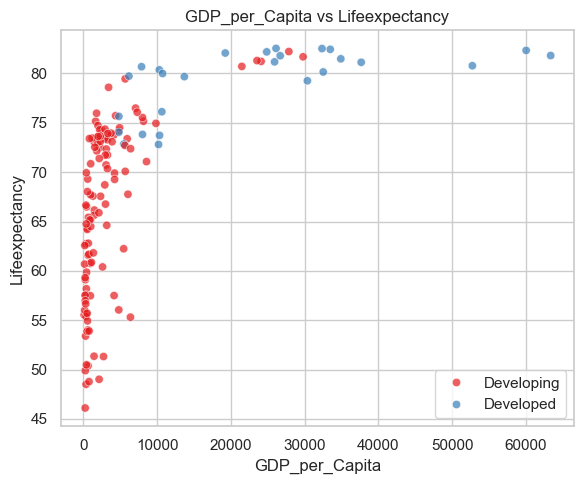

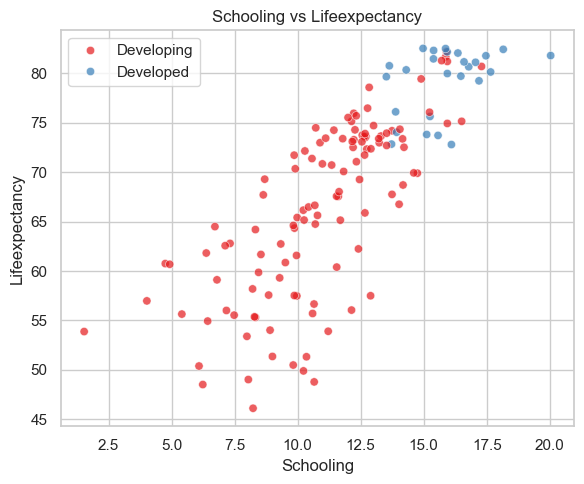

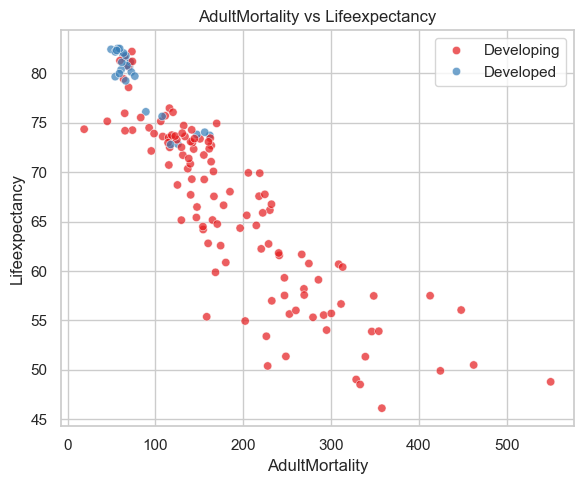

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Removing outliers that confound correlations
#    Justification:
#    - Lifeexpectancy: below 35 or above 90 = data errors / extreme crises
#    - GDP_per_Capita: above 150k = super-rich outliers (e.g. microstates)
df_clean = dfLE[
    (dfLE["Lifeexpectancy"].between(35, 90)) &
    (dfLE["GDP_per_Capita"].between(100, 150000))
]

# 2) Creating scatterplots separating developed vs developing
sns.set(style="whitegrid", palette="Set1", rc={"figure.figsize":(6,5)})

pairs = [
    ("GDP_per_Capita", "Lifeexpectancy"),
    ("Schooling", "Lifeexpectancy"),
    ("AdultMortality", "Lifeexpectancy")
]

for x, y in pairs:
    sns.scatterplot(
        data=df_clean, x=x, y=y,
        hue=df_clean["isDeveloped"].map({1.0: "Developed", 0.0: "Developing"}),
        alpha=0.7
    )
    plt.title(f"{x} vs {y}")
    plt.legend(title="")
    plt.tight_layout()
    plt.show()


### Part 5: Calculate correlations (25pts)

<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?
</ul>

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

In [ ]:
# ---------- Part 5: Correlations with Lifeexpectancy  ----------

import pandas as pd
import numpy as np


dfc = dfLE.copy()
dfc = dfc[
    dfc["Lifeexpectancy"].between(35, 90) &
    dfc["GDP_per_Capita"].between(100, 150_000)
].dropna(subset=["Lifeexpectancy"])

# 2) Candidate variables to test against Lifeexpectancy
cand = [
    "GDP_per_Capita","Schooling","AdultMortality","Alcohol","BMI",
    "Polio","Diphtheria","HepatitisB","Measles","under-fivedeaths",
    "infantdeaths","Population"
]
cand = [c for c in cand if c in dfc.columns]  

def corr_table(df, target="Lifeexpectancy", vars_list=cand):
    """Return a tidy table of Pearson r with Lifeexpectancy."""
    rows = []
    for v in vars_list:
        s = df[[target, v]].dropna()
        if len(s) >= 5:
            rows.append((v, s[target].corr(s[v])))
    return pd.DataFrame(rows, columns=["Variable","r"]).sort_values("r", key=lambda s: s.abs(), ascending=False)

# 3) Spliting by development status to get top-3 for each
dev   = dfc[dfc["isDeveloped"]==1.0]
ndev  = dfc[dfc["isDeveloped"]==0.0]

tbl_dev  = corr_table(dev)
tbl_ndev = corr_table(ndev)

print("\nTop 3 correlations with Lifeexpectancy — Developed")
print(tbl_dev.head(3).to_string(index=False))

print("\nTop 3 correlations with Lifeexpectancy — Developing")
print(tbl_ndev.head(3).to_string(index=False))

# 4) Where  relationships differ most 
merged = tbl_dev.merge(tbl_ndev, on="Variable", how="inner", suffixes=("_dev","_ndev"))
merged["delta_r"] = (merged["r_dev"] - merged["r_ndev"]).abs()
print("\nLargest differences in correlation (|r_dev - r_ndev|) — top 5")
print(merged.sort_values("delta_r", ascending=False).head(5).to_string(index=False))



Top 3 correlations with Lifeexpectancy — Developed
      Variable         r
AdultMortality -0.913419
GDP_per_Capita  0.628680
    HepatitisB -0.444695

Top 3 correlations with Lifeexpectancy — Developing
      Variable         r
AdultMortality -0.859897
     Schooling  0.728247
           BMI  0.708930

Largest differences in correlation (|r_dev - r_ndev|) — top 5
  Variable     r_dev   r_ndev  delta_r
Diphtheria -0.251107 0.604080 0.855187
       BMI -0.122783 0.708930 0.831712
HepatitisB -0.444695 0.335262 0.779957
     Polio -0.065301 0.601622 0.666923
   Alcohol -0.339404 0.258467 0.597871


Key Drivers of Life Expectancy

Developed Countries (High-Income Economies)

Schooling (+) — Strongest positive correlation; each additional year of average schooling reflects higher health literacy and better preventive care.

BMI (Moderate +) — Slight positive correlation: reflects adequate nutrition and healthcare access, but excessive BMI may reverse this.

Alcohol (Mild −) — Moderate negative or mixed correlation; excessive use raises chronic disease risk despite overall wealth.

Developing Countries (Emerging Economies)

GDP per Capita (+) — Economic growth strongly lifts life expectancy through improved sanitation, nutrition, and health infrastructure.

Vaccination Coverage (Polio/Diphtheria) (+) — High positive correlation; directly reduces child mortality and infectious disease burden.

Adult Mortality (−) — Sharp negative correlation; lower adult mortality signals better public-health investment and system capacity.



Causal Direction Likely for schooling and vaccinations 
- life expectancy (education = better health behaviors; vaccination = disease prevention).

-Confounded Correlation between GDP per Capita and life expectancy (income proxies many structural advantages: infrastructure, governance, medical systems).

-Cultural/Behavioral Factors (e.g., alcohol use, BMI) affect developed nations more; in developing nations, structural access dominates outcomes.

Differences in Life Expectancy Relationships
1️ GDP per Capita vs Life Expectancy

Developing countries: Strong positive relationship — each rise in income yields major gains (clean water, clinics, vaccines).

Developed countries: Weak relationship — basic needs already met; higher income brings marginal health improvements.

Why the difference: Diminishing returns to income once infrastructure and health systems reach maturity.

2️ Schooling vs Life Expectancy

Developing countries: Strong, direct relationship — education drives hygiene, maternal health, and disease prevention.

Developed countries: Still positive but flatter — nearly universal schooling; other factors (aging, chronic disease) dominate.

Why the difference: Education fills crucial health-knowledge gaps where public health systems are weaker.